![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)
# **Face and Eye Detection with Haar Cascade Classifiers**

####**In this lesson we'll learn:**
1. To use a Haarcascade Classifer to detect faces
2. To use a Haarcascade Classifer to detect eyes
3. To use a Haarcascade Classifer to detect faces and eyes from your webcam in Colab


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


# 1. **HAAR Cascade Classifiers**

Developed by Viola and Jones in 2001.


Asosan sliding window texnologiyasida ishlab har bir slide bolganda convolution operatsiyasiga kora edge, line, square kabi featurelar extract qilinib qaysiki correspond to class (masalan: face) lar olinadi

An object detection method that uses a series of classifiers (cascade) to identify objects in an image. They are trained to identify one type of object, however, we can use several of them in parallel e.g. detecting eyes and faces together. HAAR Classifiers are trained using lots of positive images (i.e. images with the object present) and negative images (i.e. images without the object present).
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/haar.png)



<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\murod\AppData\Local\Temp\ipykernel_14056\2873458531.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


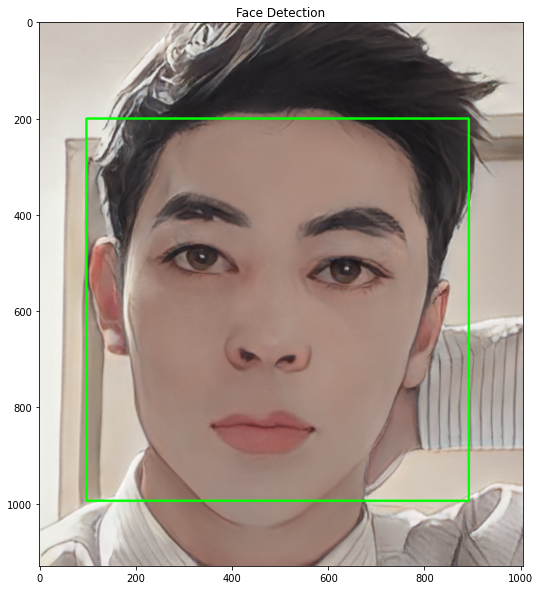

In [4]:
# classifier XML file format da saqlanad
face_classifier = cv2.CascadeClassifier('Datasets/Haarcascades/haarcascade_frontalface_default.xml')


image = cv2.imread('Datasets/images/murodil.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#face classifier topilgan ROI ni tuple sifatida (top x,y nuqtasi va bboxni width va heightni) qaytaradi 
#scaleFactor va minNeighbors argumentlari bn play around qilish orqali accuracyni sozlash mumkun.
faces = face_classifier.detectMultiScale(image=gray, scaleFactor = 1.3, minNeighbors=5)

# agar yuz topilmasa, detector () pustoy tuple qaytaradi
if faces is ():
    print("No faces found")

#Facega rectangle chizamiz, 
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 4)

imshow('Face Detection', image)

# 2. **Simple Eye & Face Detection using Haarcascade Classifiers**

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\murod\AppData\Local\Temp\ipykernel_14056\2898348001.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


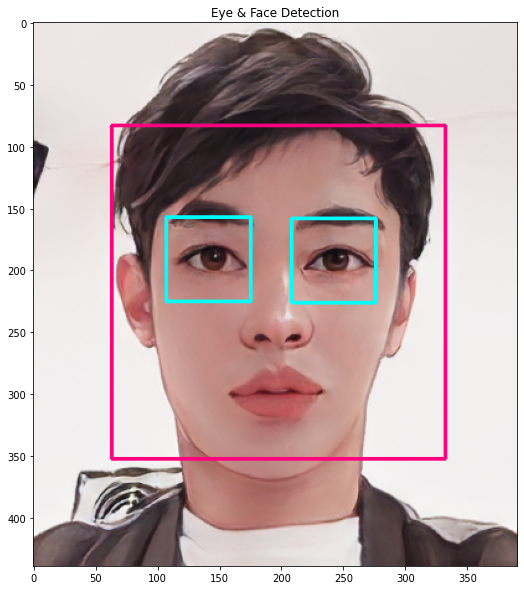

In [5]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('Datasets/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Datasets/Haarcascades/haarcascade_eye.xml')
 
img = cv2.imread('Datasets/images/murodil2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                                    
faces = face_classifier.detectMultiScale(gray, 1.2, 5)

# agar yuz topilmasa, detector () pustoy tuple qaytaradi
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w] #face qismni qirqib olamiz
    roi_color = img[y:y+h, x:x+w]
    
    #ko'zni topamiz cllassicier orqali. u ham 4 ta rectangli qiymatlarini qaytaradi,
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.5, 9) 
    for (ex,ey,ew,eh) in eyes: 
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)

# 3. **Webcam detection**

In [8]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('Datasets/Haarcascades/haarcascade_frontalface_alt2.xml')
eye_classifier = cv2.CascadeClassifier('Datasets/Haarcascades/haarcascade_eye.xml')


cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
      
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
   
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is ():
        cv2.imshow('Face webcam', frame)   
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    cv2.imshow('Face webcam', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()      

<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\murod\AppData\Local\Temp\ipykernel_14056\1129959977.py:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


# 4. Google colab webcam

In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

ModuleNotFoundError: No module named 'google.colab'

In [11]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

name 'take_photo' is not defined
